<a href="https://colab.research.google.com/github/radhakrishnan-omotec/nikhil-heart-repo/blob/main/heart_rate_RF_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.67
Random Forest Precision: 0.80
Random Forest Recall: 0.67
Random Forest F1 Score: 0.66


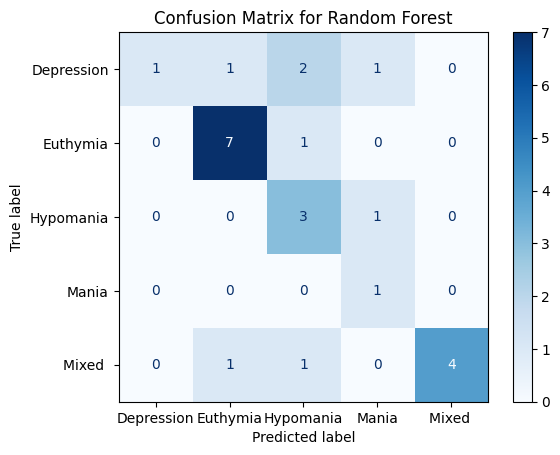

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df= pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\heart_rate_dataset_bipolar_disorder_patients.csv")
df = df.rename(columns={"Class label": "target"})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Creating interaction features
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']

# Defining features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male']]
y = df['target']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Initialize Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform Grid Search for Random Forest
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Best parameters for Random Forest
best_params_rf = grid_search_rf.best_params_
print(f'Best Parameters for Random Forest: {best_params_rf}')

# Use the best model to predict on test data
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print evaluation metrics
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print(f'Random Forest Precision: {precision_rf:.2f}')
print(f'Random Forest Recall: {recall_rf:.2f}')
print(f'Random Forest F1 Score: {f1_rf:.2f}')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=grid_search_rf.classes_)
disp_rf.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
df

,Age,Heart Rate,target,Gender_Male,Age_HeartRate
0,40,82,Depression,True,3280
1,38,86,Depression,True,3268
2,35,82,Depression,True,2870
3,58,67,Depression,True,3886
4,45,76,Depression,True,3420
...,...,...,...,...,...
495,45,92,Mixed,True,4140
496,55,92,Mixed,True,5060
497,46,93,Mixed,True,4278
498,45,82,Mixed,False,3690


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load and preprocess the dataset
df = pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\heart_rate_dataset_bipolar_disorder_patients.csv")
df = df.rename(columns={"Class label": "target"})
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']

# Define features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Initialize and train Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, scoring='accuracy', cv=5, n_jobs=1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Save the best model
best_rf_model = grid_search_rf.best_estimator_

# Function to predict target based on user input
def predict_target(age, heart_rate, gender):
    # Create interaction feature
    age_heart_rate = age * heart_rate

    # Prepare the input data
    gender_male = 1 if gender.lower() == 'male' else 0
    input_data = pd.DataFrame([[age, heart_rate, age_heart_rate, gender_male]], columns=['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male'])

    # Predict
    prediction = best_rf_model.predict(input_data)

    return prediction[0]

# Get user input
try:
    age = int(input("Enter age: "))
    heart_rate = int(input("Enter heart rate: "))
    gender = input("Enter gender (male/female): ").strip()

    if gender.lower() not in ['male', 'female']:
        raise ValueError("Invalid gender. Please enter 'male' or 'female'.")

    # Predict and display result
    result = predict_target(age, heart_rate, gender)
    print(f'The predicted target for Age={age}, Heart Rate={heart_rate}, Gender={gender} is: {result}')
except ValueError as ve:
    print(f"Invalid input. {ve}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


Enter age:  40
Enter heart rate:  82
Enter gender (male/female):  male


The predicted target for Age=40, Heart Rate=82, Gender=male is: Depression


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load and preprocess the dataset
df = pd.read_csv("C:\\Users\\OMOPC58\\Downloads\\heart_rate_dataset_bipolar_disorder_patients.csv")
df = df.rename(columns={"Class label": "target"})

# Encode Gender and create interaction features
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)
df['Age_HeartRate'] = df['Age'] * df['Heart Rate']

# Define features and target
X = df[['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male']]
y = df['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0478, random_state=42)

# Initialize and train Random Forest Classifier using GridSearchCV
random_forest = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf,
                              scoring='accuracy', cv=5, n_jobs=1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Save the trained model to a file using pickle (optional)
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

print("Model training complete and saved for future use!")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Model training complete and saved for future use!


In [ ]:
import pickle
import pandas as pd

# Load the trained model (if you saved it with pickle, otherwise you can skip this step)
with open('random_forest_model.pkl', 'rb') as model_file:
    best_rf_model = pickle.load(model_file)

# Function to predict target based on user input
def predict_target(age, heart_rate, gender):
    # Create interaction feature
    age_heart_rate = age * heart_rate

    # Prepare the input data (1 for Male, 0 for Female)
    gender_male = 1 if gender.lower() == 'male' else 0
    input_data = pd.DataFrame([[age, heart_rate, age_heart_rate, gender_male]],
                              columns=['Age', 'Heart Rate', 'Age_HeartRate', 'Gender_Male'])

    # Predict
    prediction = best_rf_model.predict(input_data)

    return prediction[0]

# Get user input for prediction (you can do this multiple times without retraining the model)
try:
    age = int(input("Enter age: "))
    heart_rate = int(input("Enter heart rate: "))
    gender = input("Enter gender (male/female): ").strip()

    if gender.lower() not in ['male', 'female']:
        raise ValueError("Invalid gender. Please enter 'male' or 'female'.")

    # Predict and display result
    result = predict_target(age, heart_rate, gender)
    print(f'The predicted target for Age={age}, Heart Rate={heart_rate}, Gender={gender} is: {result}')
except ValueError as ve:
    print(f"Invalid input. {ve}")


Enter age:  39
Enter heart rate:  82
Enter gender (male/female):  female


The predicted target for Age=39, Heart Rate=82, Gender=female is: Euthymia
